In [2]:
### Business Problem:
###The company is experiencing unstable profit margins across regions and product categories. 
###Goal is to identify drivers of performance and recommend strategic insights.

### Objectives:
#- Analyze sales & profit trends
#- Identify loss-making categories/regions
#- Evaluate discount impact on profit
#- Identify best customer segments
#- Propose actionable recommendations

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("Global_Superstore.csv", encoding="latin1")
df.head()

Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories   
1   FUR-CH-10003950   Furniture       Chairs   
2   TEC-PH-10004664  Technology       Phones   
3   TEC-PH-10004583  Technology       Phones   
4  TEC-SHA-10000501  Technology      Copiers   

                                        Product Name     Sales Quantity  \
0  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1          Novimex Executive Leather Armchair, Black  3709.395        9   
2                  Nokia Smart Phone, with Caller ID  5175.171        9   
3                     Motorola Smart Phone, Cordless  2892.510        5   
4                     Sharp Wireless Fax, High-Speed  2832.960        8   

  Discount    Profit  Shipping Cost  Order Priority  
0      0.0  762.1845         933.57        Critical  
1      0.1 -288.7650         923.63        Critical  
2      0.1  919.9710         915.49          Medium  
3      0.1  -96.5400         910.16          Medium  
4      0.0  311.5200         903.04        Critical  

[5 rows x 24 columns]

In [7]:
df.columns = df.columns.str.strip()

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Quarter'] = df['Order Date'].dt.to_period('Q')
df['Profit Flag'] = np.where(df['Profit'] < 0, 'Loss', 'Profit')

C:\Users\Dell\AppData\Local\Temp\ipykernel_11376\346531729.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_11376\346531729.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [9]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
loss_orders = df[df['Profit'] < 0].shape[0]

print("Project Summary Metrics")
print("Total Sales:", total_sales)
print("Total Profit:", total_profit)
print("Number of Loss-Making Orders:", loss_orders)

Project Summary Metrics
Total Sales: 12642501.909880001
Total Profit: 1467457.29128
Number of Loss-Making Orders: 12544


In [10]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
loss_orders = df[df['Profit'] < 0].shape[0]

print("Project Summary Metrics")
print("Total Sales:", total_sales)
print("Total Profit:", total_profit)
print("Number of Loss-Making Orders:", loss_orders)

Project Summary Metrics
Total Sales: 12642501.909880001
Total Profit: 1467457.29128
Number of Loss-Making Orders: 12544


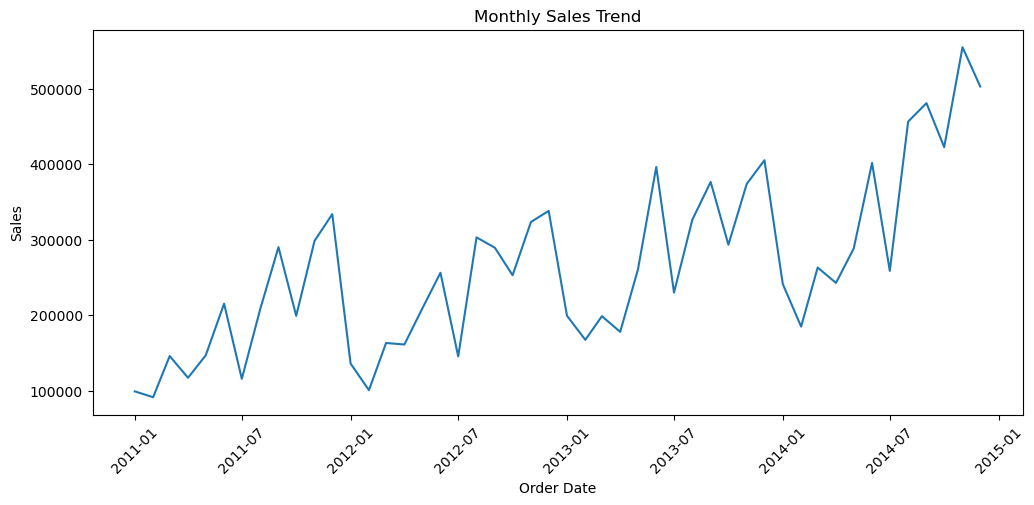

In [11]:
monthly = df.groupby([df['Order Date'].dt.to_period('M')])['Sales'].sum().reset_index()
monthly['Order Date'] = monthly['Order Date'].dt.to_timestamp()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly, x='Order Date', y='Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()

In [14]:
import scipy.stats as stats

seg_a = df[df['Segment'] == 'Consumer']['Profit']
seg_b = df[df['Segment'] == 'Corporate']['Profit']

result = stats.ttest_ind(seg_a, seg_b, equal_var=False)

print("T-test result for Consumer vs Corporate Segments")
print("T-statistic:", result.statistic)
print("P-value:", result.pvalue)

T-test result for Consumer vs Corporate Segments
T-statistic: -0.19192651562608662
P-value: 0.847800993188607


<Axes: >

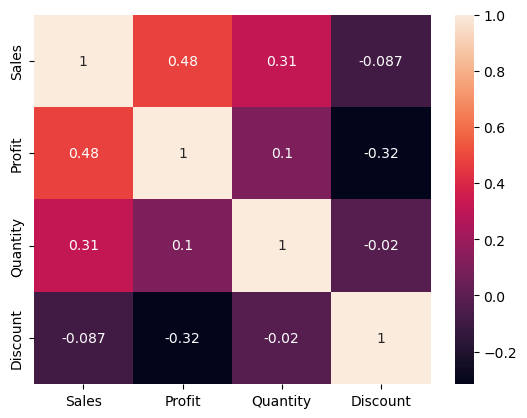

In [13]:
sns.heatmap(df[['Sales','Profit','Quantity','Discount']].corr(), annot=True)

In [15]:
loss = df[df['Profit'] < 0].groupby('Sub-Category')['Profit'].sum().sort_values()
loss.head(10)

Sub-Category
Tables        -144123.14860
Bookcases     -101446.29730
Phones         -96417.66010
Chairs         -96084.89690
Machines       -78672.74030
Storage        -76063.97800
Copiers        -71547.49982
Appliances     -63991.69040
Binders        -52884.06130
Accessories    -39857.49820
Name: Profit, dtype: float64

<Axes: xlabel='Discount', ylabel='Profit'>

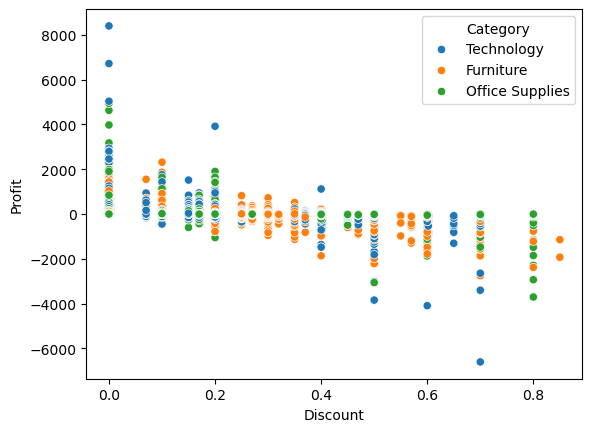

In [16]:
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')

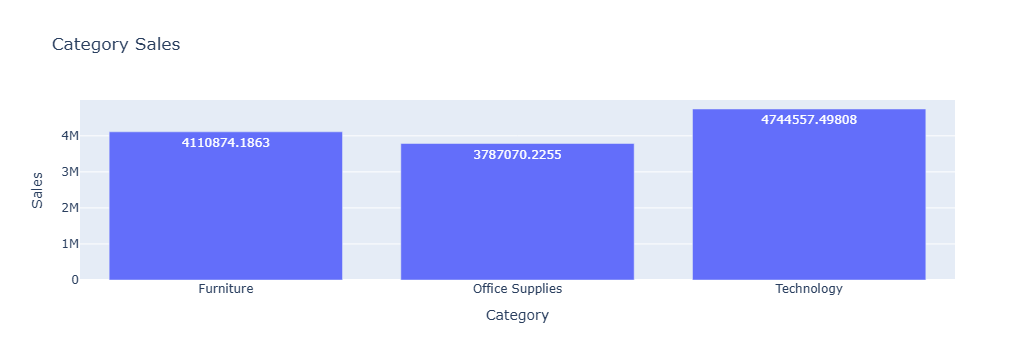

In [17]:
top_cat = df.groupby('Category')['Sales'].sum().reset_index()
px.bar(top_cat, x='Category', y='Sales', title='Category Sales', text='Sales')

<Axes: xlabel='Category', ylabel='Region'>

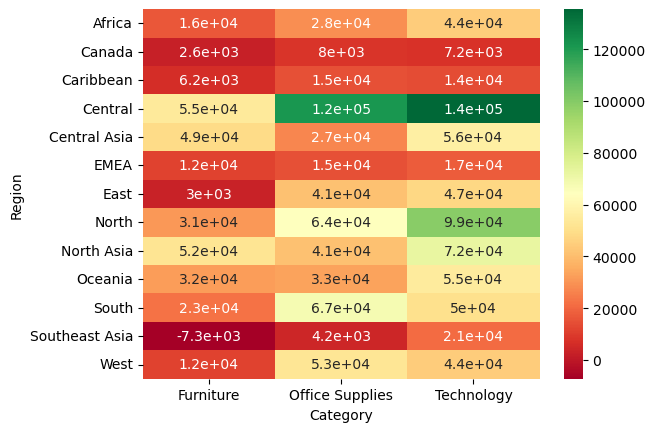

In [18]:
pivot = df.pivot_table(values='Profit', index='Region', columns='Category', aggfunc='sum')
sns.heatmap(pivot, annot=True, cmap='RdYlGn')